In [ ]:
#Install dependencies
#pip install tensorflow keras opencv-python numpy matplotlib albumentations


### Step 1 : Importing Libraries

In [59]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import albumentations as A

### Step 2 : Strick through Generating Dataset 

In [61]:
import cv2
import numpy as np
import random
import os

# Create directories for output images and masks
os.makedirs("output_images", exist_ok=True)
os.makedirs("output_masks", exist_ok=True)

# Sample words for generating text
WORDS = ["Machine", "Learning", "Deep", "Neural", "Network", "AI", "Data", "Science","12/04/2025","(30) months","10 days","42 months","1 month","2 months","3 months","4 months","5 months","6 months","7 months","8 months","9 months","10 months","11 months","12 months","(12 months)"]

# Function to generate random text with strikethrough
def generate_strikethrough_image(image_index):
    text = " ".join(random.sample(WORDS, random.randint(2, 4)))  # Random 2-4 words
    
    # Create a blank white image
    img = np.ones((100, 400, 3), dtype=np.uint8) * 255
    mask = np.zeros((100, 400), dtype=np.uint8)  # Binary mask

    # Define font properties
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2
    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]

    # Calculate text position (centered)
    text_x = (img.shape[1] - text_size[0]) // 2
    text_y = (img.shape[0] + text_size[1]) // 2

    # Draw text
    cv2.putText(img, text, (text_x, text_y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # Select a random word for strikethrough
    words = text.split()
    start_word_idx = random.randint(0, len(words) - 2)  # Select starting word
    end_word_idx = min(start_word_idx + 1, len(words) - 1)  # Select max 2 words

    # Compute line position for selected words
    words_before = " ".join(words[:start_word_idx])
    strike_start_x = text_x + cv2.getTextSize(words_before, font, font_scale, thickness)[0][0]
    strike_end_x = text_x + cv2.getTextSize(" ".join(words[:end_word_idx + 1]), font, font_scale, thickness)[0][0]
    strike_y = text_y - text_size[1] // 2  # Middle of text

    # Randomize strikethrough style
    line_thickness = random.randint(2, 4)
    angle = random.randint(-5, 5)

    # Apply line with angle
    strike_start_y = strike_y + angle
    strike_end_y = strike_y - angle
    cv2.line(img, (strike_start_x, strike_start_y), (strike_end_x, strike_end_y), (0, 0, 0), line_thickness)
    cv2.line(mask, (strike_start_x, strike_start_y), (strike_end_x, strike_end_y), 255, line_thickness)

    # Save images
    cv2.imwrite(f"output_images/text_{image_index}.png", img)
    cv2.imwrite(f"output_masks/mask_{image_index}.png", mask)

# Generate N images
N = 100  # Set the number of images to generate
for i in range(N):
    generate_strikethrough_image(i)

print(f"✅ Successfully generated {N} images with strikethrough text!")


✅ Successfully generated 100 images with strikethrough text!


In [75]:
import cv2
import numpy as np
import random
import os

# Create directories for output images and masks
os.makedirs("output_images", exist_ok=True)
os.makedirs("output_masks", exist_ok=True)

# Expanded list of words (legal, financial, contract terms, dates, numbers)
WORDS = [
    "Agreement", "Contract", "Obligation", "Liability", "Indemnity", "Termination", 
    "Confidential", "Breach", "Clause", "Jurisdiction", "Force Majeure", "Arbitration",
    "Machine", "Learning", "Deep", "Neural", "Network", "AI", "Data", "Science",
    "12/04/2025", "(30) months", "10 days", "42 months", "1 month", "2 months",
    "NET 30", "NET 60", "NET 90", "Interest Rate", "Revenue", "Profit", "Loss",
    "Tax", "Settlement", "Escrow", "Penalty", "Compensation", "Invoice", "Due Date"
]

# Font styles
FONTS = [
    cv2.FONT_HERSHEY_SIMPLEX, cv2.FONT_HERSHEY_COMPLEX, 
    cv2.FONT_HERSHEY_TRIPLEX, cv2.FONT_HERSHEY_SCRIPT_SIMPLEX
]

# Strikethrough styles
STRIKE_TYPES = ["single", "double", "zigzag", "dotted", "dashed", "wavy", "cross", "scribble"]

def add_noise(image):
    """Adds random noise and distortion."""
    noise = np.random.normal(0, 25, image.shape).astype(np.uint8)  
    return cv2.addWeighted(image, 0.85, noise, 0.15, 0)

def draw_dotted_line(img, mask, start_x, end_x, y, thickness):
    """Draws a dotted strikethrough line."""
    step = 10
    for x in range(start_x, end_x, step):
        cv2.circle(img, (x, y), thickness, (0, 0, 0), -1)
        cv2.circle(mask, (x, y), thickness, 255, -1)

def draw_dashed_line(img, mask, start_x, end_x, y, thickness):
    """Draws a dashed strikethrough line."""
    step = 20
    for x in range(start_x, end_x, step):
        cv2.line(img, (x, y), (x + step // 2, y), (0, 0, 0), thickness)
        cv2.line(mask, (x, y), (x + step // 2, y), 255, thickness)

def draw_wavy_line(img, mask, start_x, end_x, y, thickness):
    """Draws a wavy strikethrough line."""
    step = 15
    for x in range(start_x, end_x, step):
        offset = random.randint(-3, 3)
        cv2.line(img, (x, y + offset), (x + step, y - offset), (0, 0, 0), thickness)
        cv2.line(mask, (x, y + offset), (x + step, y - offset), 255, thickness)

def draw_cross_line(img, mask, start_x, end_x, y, text_height, thickness):
    """Draws an X (cross) strikethrough line."""
    mid_x = (start_x + end_x) // 2
    y_top = y - text_height // 2
    y_bottom = y + text_height // 2

    cv2.line(img, (start_x, y_top), (end_x, y_bottom), (0, 0, 0), thickness)
    cv2.line(img, (start_x, y_bottom), (end_x, y_top), (0, 0, 0), thickness)
    cv2.line(mask, (start_x, y_top), (end_x, y_bottom), 255, thickness)
    cv2.line(mask, (start_x, y_bottom), (end_x, y_top), 255, thickness)

def draw_scribble(img, mask, start_x, end_x, y, thickness):
    """Draws random scribbles for strikethrough."""
    num_lines = random.randint(3, 6)
    for _ in range(num_lines):
        x1 = random.randint(start_x, end_x)
        x2 = random.randint(start_x, end_x)
        y1 = y + random.randint(-5, 5)
        y2 = y + random.randint(-5, 5)
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 0), thickness)
        cv2.line(mask, (x1, y1), (x2, y2), 255, thickness)

def generate_strikethrough_image(image_index):
    text = " ".join(random.sample(WORDS, random.randint(2, 4)))  

    # Create a blank white image
    img = np.ones((100, 400, 3), dtype=np.uint8) * 255
    mask = np.zeros((100, 400), dtype=np.uint8)  

    # Select font and properties randomly
    font = random.choice(FONTS)
    font_scale = random.uniform(0.8, 1.2)
    thickness = random.randint(1, 3)

    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
    text_x = (img.shape[1] - text_size[0]) // 2
    text_y = (img.shape[0] + text_size[1]) // 2

    # Draw text
    cv2.putText(img, text, (text_x, text_y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # Select a random word for strikethrough
    words = text.split()
    start_word_idx = random.randint(0, len(words) - 2)
    end_word_idx = min(start_word_idx + random.randint(1, 2), len(words) - 1)

    words_before = " ".join(words[:start_word_idx])
    strike_start_x = text_x + cv2.getTextSize(words_before, font, font_scale, thickness)[0][0]
    strike_end_x = text_x + cv2.getTextSize(" ".join(words[:end_word_idx + 1]), font, font_scale, thickness)[0][0]
    strike_y = text_y - text_size[1] // 2  

    # Random strikethrough style
    strike_type = random.choice(STRIKE_TYPES)
    line_thickness = random.randint(2, 4)

    if strike_type == "single":
        cv2.line(img, (strike_start_x, strike_y), (strike_end_x, strike_y), (0, 0, 0), line_thickness)
        cv2.line(mask, (strike_start_x, strike_y), (strike_end_x, strike_y), 255, line_thickness)

    elif strike_type == "double":
        cv2.line(img, (strike_start_x, strike_y - 3), (strike_end_x, strike_y - 3), (0, 0, 0), line_thickness)
        cv2.line(img, (strike_start_x, strike_y + 3), (strike_end_x, strike_y + 3), (0, 0, 0), line_thickness)

    # elif strike_type == "dotted":
    #     draw_dotted_line(img, mask, strike_start_x, strike_end_x, strike_y, line_thickness)

    # elif strike_type == "dashed":
    #     draw_dashed_line(img, mask, strike_start_x, strike_end_x, strike_y, line_thickness)

    elif strike_type == "wavy":
        draw_wavy_line(img, mask, strike_start_x, strike_end_x, strike_y, line_thickness)

    elif strike_type == "cross":
        draw_cross_line(img, mask, strike_start_x, strike_end_x, strike_y, text_size[1], line_thickness)

    elif strike_type == "scribble":
        draw_scribble(img, mask, strike_start_x, strike_end_x, strike_y, line_thickness)

    img = add_noise(img)
    return img, mask
    # cv2.imwrite(f"output_images/text_{image_index}.png", img)
    # cv2.imwrite(f"output_masks/mask_{image_index}.png", mask)

def save_compressed_image(image, mask, image_index):
    # Resize image to reduce file size
    image = cv2.resize(image, (200, 50))  
    mask = cv2.resize(mask, (200, 50))  

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Save images in JPEG format with compression
    cv2.imwrite(f"output_images/text_{image_index}.jpg", gray_image, [cv2.IMWRITE_JPEG_QUALITY, 30])
    cv2.imwrite(f"output_masks/mask_{image_index}.jpg", mask, [cv2.IMWRITE_JPEG_QUALITY, 30])

N = 1000  
for i in range(N):
    img,mask = generate_strikethrough_image(i)
    save_compressed_image(img,mask,i)  

print(f"✅ Generated {N} Images")


✅ Generated 1000 Images


### Step 3 : Create Train test split 

In [76]:
import os
import cv2
import numpy as np
import albumentations as A
from sklearn.model_selection import train_test_split

# Set dataset paths
IMG_DIR = "output_images/"
MASK_DIR = "output_masks/"
IMG_SIZE = (256, 256)

# Data augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussianBlur(p=0.2),
])

def load_data(img_dir, mask_dir):
    images, masks = [], []
    
    # Get sorted image filenames
    file_names = sorted(os.listdir(img_dir))

    for filename in file_names:
        img_path = os.path.join(img_dir, filename)

        # Convert "text_X.png" → "mask_X.png"
        mask_filename = filename.replace("text_", "mask_")  
        mask_path = os.path.join(mask_dir, mask_filename)

        if not os.path.exists(mask_path):
            print(f"Warning: No mask found for {filename}, skipping...")
            continue

        # Read and resize image
        img = cv2.imread(img_path)
        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0  # Normalize

        # Read and resize mask
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, IMG_SIZE)
        mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
        mask = mask / 255.0  # Normalize

        # Apply augmentation
        augmented = transform(image=img, mask=mask)
        img = augmented["image"]
        mask = augmented["mask"]

        images.append(img)
        masks.append(mask)

    return np.array(images), np.array(masks)

# Load dataset
X, Y = load_data(IMG_DIR, MASK_DIR)

# Split into training & testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print dataset shape
print(f"✅ Training data: {X_train.shape}, Test data: {X_test.shape}")


✅ Training data: (800, 256, 256, 3), Test data: (200, 256, 256, 3)


### Step 4 : Defining CNN model 

In [77]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Input
from tensorflow.keras.models import Model

# U-Net Model
def build_unet(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    
    # Encoder (Downsampling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)

    # Decoder (Upsampling)
    up5 = UpSampling2D(size=(2, 2))(conv4)
    merge5 = concatenate([conv3, up5], axis=3)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(merge5)
    conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)

    up6 = UpSampling2D(size=(2, 2))(conv5)
    merge6 = concatenate([conv2, up6], axis=3)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(merge6)
    conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

    up7 = UpSampling2D(size=(2, 2))(conv6)
    merge7 = concatenate([conv1, up7], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    # Output Layer
    outputs = Conv2D(1, 1, activation='sigmoid', padding='same')(conv7)

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build U-Net model
unet_model = build_unet()

### Step 5 : Training CNN model 

In [ ]:
# Train model
BATCH_SIZE = 16
EPOCHS = 4

history = unet_model.fit(
    X_train, Y_train, 
    validation_data=(X_test, Y_test),
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS
)

# Save trained model    
unet_model.save("strikethrough_detector.h5")
print("✅ Model trained & saved as strikethrough_detector.h5")


### Step 6 : testing accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


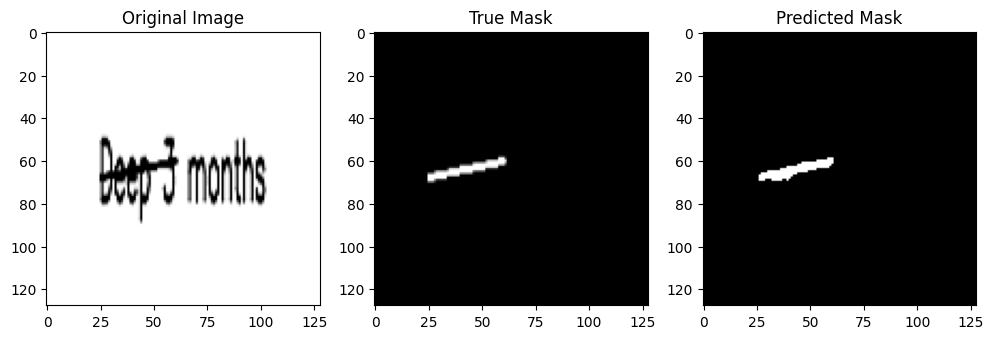

In [18]:
import matplotlib.pyplot as plt

# Select a random test image
idx = np.random.randint(0, len(X_test))
test_img = X_test[idx]
test_mask = Y_test[idx]

# Predict the mask
pred_mask = unet_model.predict(np.expand_dims(test_img, axis=0))[0]

# Convert to binary format (Thresholding)
pred_mask = (pred_mask > 0.5).astype(np.uint8)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(test_img)
ax[0].set_title("Original Image")

ax[1].imshow(test_mask[:, :, 0], cmap='gray')
ax[1].set_title("True Mask")

ax[2].imshow(pred_mask[:, :, 0], cmap='gray')
ax[2].set_title("Predicted Mask")

plt.show()


### Step 7 : testing on original data

In [87]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

model_path = r"model\\strikethrough_detector_epoch8_size128.h5"
image_path = r"..\\img\\page4.png"

# Load the trained model
model = tf.keras.models.load_model(model_path)

In [89]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


original_image = cv2.imread(image_path)
height, width, _ = original_image.shape

# Define patch size (same as model input size)
PATCH_SIZE = 128
STRIDE = PATCH_SIZE // 2  # Overlapping stride

# Prepare output mask
output_mask = np.zeros((height, width), dtype=np.float32)

# Iterate over patches
for y in range(0, height - PATCH_SIZE, STRIDE):
    for x in range(0, width - PATCH_SIZE, STRIDE):
        patch = original_image[y:y+PATCH_SIZE, x:x+PATCH_SIZE]  # Extract patch
        patch = patch / 255.0  # Normalize
        patch = np.expand_dims(patch, axis=0)  # Add batch dimension
        
        # Predict mask for this patch
        pred_mask = model.predict(patch)[0]  # Remove batch dimension
        pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Threshold
        
        # Place patch back into output mask
        output_mask[y:y+PATCH_SIZE, x:x+PATCH_SIZE] = pred_mask.squeeze()

# Resize mask back to original size
output_mask = (output_mask * 255).astype(np.uint8)
print(f"✅ Successfully generated mask for {image_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

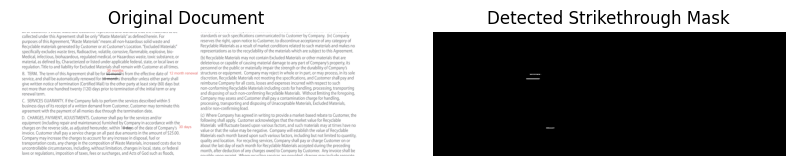

In [90]:
plt.figure(figsize=(10, 5))

# Show Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Document")
plt.axis("off")

# Show Detected Strikethrough Mask
plt.subplot(1, 2, 2)
plt.imshow(output_mask, cmap="gray")
plt.title("Detected Strikethrough Mask")
plt.axis("off")

plt.show()


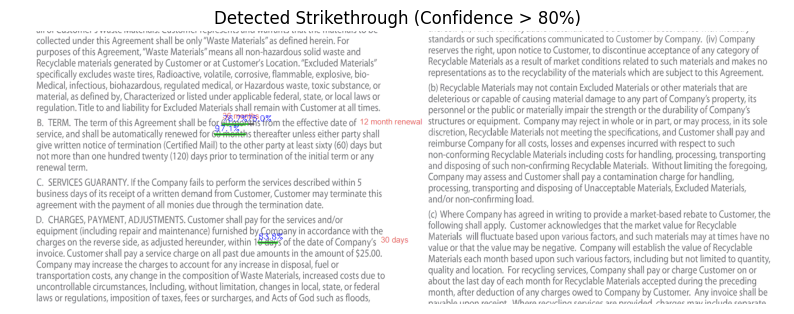

In [92]:
# Convert mask to binary format
binary_mask = (output_mask > 128).astype(np.uint8) * 255  # Ensure binary mask

# Find contours of strikethrough areas
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing
output_image = original_image.copy()

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    
    # Calculate confidence as the ratio of white pixels inside the box
    mask_region = binary_mask[y:y+h, x:x+w]
    confidence = np.sum(mask_region) / (w * h * 255)  # Normalize confidence (0 to 1)
    
    if confidence >= 0.50:  # Only consider detections above 80%
        # Draw rectangle on the original image
        cv2.rectangle(output_image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        
        # Put confidence score as text
        text = f"{confidence*100:.1f}%"
        cv2.putText(output_image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Strikethrough (Confidence > 80%)")
plt.axis("off")
plt.show()

